<a href="https://colab.research.google.com/github/dhairyaostwal/CSE4020-Codes/blob/main/Adaboost/Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [30]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from matplotlib import pyplot

## Loading Dataset

In [31]:
dataset = pd.read_csv('cancer-data-manipulated - cancer-data.csv')

In [32]:
dataset

,avg_cyt_re,avg_cyt_gr,avg_cyt_bl,Diagnosis
0,130.713275,123.667915,145.271328,M
1,115.975610,67.243902,140.126016,B
2,135.955693,129.935312,144.863093,M
3,131.139544,122.655338,143.148741,M
4,150.808105,142.667461,176.097735,M
5,130.945142,91.728024,147.307336,B
6,90.649587,58.960331,96.546006,B
7,132.686975,126.090336,151.857143,M
8,143.154220,131.805585,163.624921,M
9,126.637787,112.096381,143.146486,B


## Split Dataset

In [42]:
X = dataset.iloc[:, 2:-1].values
y = dataset.iloc[:, -1].values

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## Building the AdaBoost Model

In [44]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

## Evaluate Model

In [45]:
# Model Accuracy, how often is the classifier correct?
score1 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


## Using Different Base Learners
I have used SVC as a base estimator. You can use any ML learner as base estimator if it accepts sample weight such as Decision Tree, Support Vector Classifier.

### SVC

In [46]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Import Support Vector Classifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')

# Create adaboost classifer object
abc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)

# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


# Model Accuracy, how often is the classifier correct?
score2 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


### Decision Tree Classifier

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)

abc = AdaBoostClassifier(n_estimators=50, base_estimator=clf,learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
score3 = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6666666666666666


## Performance Comparison

In [63]:
# plot model performance for comparison

results, names =list(), list()
results=[[score1], [score2], [score3]]
names=[['No base learner'], ['SVC'], ['Decision Tree']]

print(results)
print('\n\n')
print(names)


[[0.6666666666666666], [0.6666666666666666], [0.6666666666666666]]



[['No base learner'], ['SVC'], ['Decision Tree']]


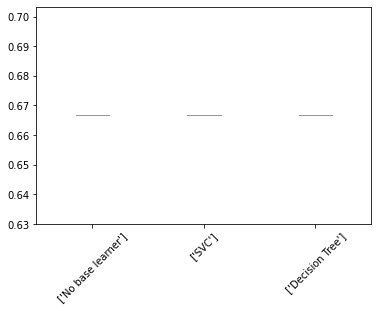

In [66]:
# df = pd.DataFrame(results, columns=names)
# df.plot.box(grid='True')
pyplot.boxplot(results, labels=names) 
pyplot.xticks(rotation=45)
pyplot.show()

## Conclusion

